<a href="https://colab.research.google.com/github/mirpouya/Pytorch_Tutorial/blob/main/02_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Make Classificatin data and get it ready

In [1]:
import sklearn
from sklearn.datasets import make_circles

In [2]:
# make a 1000 sampes
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
# first 5 samples
print(f"first 5 samples of X: {X[:5]}")
print(f"first 5 samples of y: {y[:5]}")

first 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y: [1 1 1 1 0]


In [5]:
# make DataFrame wit pandas
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
# visualize the data
import matplotlib.pyplot as plt

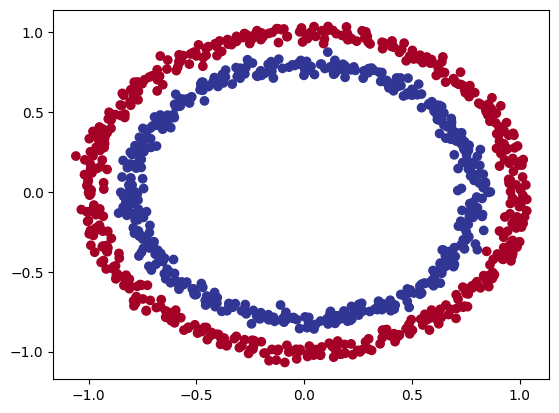

In [7]:
plt.scatter(x = X[:, 0],
             y = X[:, 1],
             c = y,
             cmap = plt.cm.RdYlBu)

## 1.1 Check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# represent data in tensors

## 1.2 Turn data into tensors and create train and test splits

In [10]:
import torch
torch.__version__

'2.0.1+cu118'

In [11]:
X.dtype, type(X)

(dtype('float64'), numpy.ndarray)

In [12]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
X.dtype, type(X)

(torch.float32, torch.Tensor)

## Split data into train and test

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [16]:
len(X_train), len(X_test)

(750, 250)

## <b> 2. Building a model </b>

1. setup device agnostic code so our model will run on GPU if there is one
2. Construct a model - by subclassing `nn.Module`
3. define loss function and optimizer
4. create train and test loop

In [17]:
import torch
from torch import nn

# make device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

create a model that:

1. subclass `nn.Module` - almost all models in PyTorch subclass `nn.Module`
2. create 2 `nn.Linear()` - 2 layers is needed to handle the shape of our data
3. define a forward method `forward()` that outlines the forward pass of the model - forward computation of the model
4. instantiate an instance of our model class and send it to the target `device`

In [18]:
# 1. construct a model that subclasses nn.Module
class CircleModel_v0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. create 2 nn.Linear()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

# override forward method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

In [19]:
# 4. instantiate an instance of our model class and send it to the target device
model_0 = CircleModel_v0().to(device)

In [20]:
model_0

CircleModel_v0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
device

'cpu'

In [22]:
# where is model parameters
next(model_0.parameters()).device

device(type='cpu')

## <b> Using `nn.Sequentisl` to build the same model </b>

In [23]:
# let's replicate the model above using nn.Sequential()

model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [24]:
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In fact, we can move `nn.Sequential` into our customized models

In [25]:
class CircleModel_v1(nn.Module):
  def __init__(self):
    super().__init__()
    # create a 2 linear layers
    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )

  # overriding forward method
  def forward(self, x):
    return self.two_linear_layers(x)

In [26]:
model_2 = CircleModel_v1().to(device)

In [27]:
model_2

CircleModel_v1(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [28]:
model_2.state_dict()

OrderedDict([('two_linear_layers.0.weight',
              tensor([[ 0.5526,  0.1090],
                      [-0.4335, -0.0737],
                      [ 0.5126, -0.3940],
                      [-0.2439,  0.2891],
                      [-0.6693, -0.2915]])),
             ('two_linear_layers.0.bias',
              tensor([ 0.4872,  0.2722, -0.3260,  0.5267, -0.2286])),
             ('two_linear_layers.1.weight',
              tensor([[0.4380, 0.3662, 0.2498, 0.2927, 0.1943]])),
             ('two_linear_layers.1.bias', tensor([-0.2356]))])

In [29]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2386, -0.4912],
                      [-0.2927,  0.0763],
                      [-0.4709,  0.6587],
                      [-0.0231, -0.0673],
                      [-0.5306,  0.2936]])),
             ('0.bias', tensor([-0.2806,  0.0279, -0.0621,  0.5192, -0.3562])),
             ('1.weight',
              tensor([[ 0.0179, -0.2464, -0.2587, -0.0157, -0.4197]])),
             ('1.bias', tensor([0.0645]))])

In [30]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5539, -0.2605],
                      [-0.1453, -0.4316],
                      [-0.6735,  0.4435],
                      [ 0.4223,  0.2551],
                      [-0.4387, -0.5389]])),
             ('layer_1.bias',
              tensor([-0.6266,  0.4140, -0.1561, -0.4975,  0.5761])),
             ('layer_2.weight',
              tensor([[ 0.2133,  0.1699,  0.3303, -0.2241, -0.3686]])),
             ('layer_2.bias', tensor([-0.1311]))])

In [31]:
with torch.inference_mode():
  untrained_preds = model_2(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, shape: {X_test.shape}")

Length of predictions: 250, shape: torch.Size([250, 1])
Length of test samples: 250, shape: torch.Size([250, 2])


In [32]:
print(f"first 10 predictions:\n {untrained_preds[:10]}")
print(f"\nfirst 10 labels:\n {y_test[:10]}")

first 10 predictions:
 tensor([[0.0681],
        [0.0582],
        [0.1145],
        [0.0549],
        [0.1467],
        [0.1404],
        [0.0869],
        [0.1063],
        [0.1130],
        [0.0579]])

first 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## <b> 2.1 Setup loss function and optimizer <b>

In [33]:
# setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built in

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [34]:
# calculate accuracy at the same time
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## <b> 3. Train model <b>

To train the model, wee need to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### <b> 3.1 Going from war logits -> prediction probabilities -> prediction labels </b>

Our model outputs are going to be raw **logits**

We can convert these **logits** into prediction probabilities by passing them to sum kind of activation function (e.g. Sigmoid for binary crossentropy and softmax for multiclass classification)

In [35]:
model_2

CircleModel_v1(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [36]:
# view the first 5 outputs of the forward pass on the test data
y_logits = model_2(X_test.to(device))[:5]
y_logits

tensor([[0.0681],
        [0.0582],
        [0.1145],
        [0.0549],
        [0.1467]], grad_fn=<SliceBackward0>)

## <b> Recap </b>

In [37]:
# make a model
model_circle_classificatoin = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [38]:
model_circle_classificatoin

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [39]:
# Make predictions with the model
with torch.inference_mode():
  untrained_preds = model_circle_classificatoin(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 250, Shape: torch.Size([250, 1])
Length of test samples: 250, Shape: torch.Size([250])

First 10 predictions:
tensor([[0.0557],
        [0.0333],
        [0.1195],
        [0.0375],
        [0.1280],
        [0.1143],
        [0.0447],
        [0.0637],
        [0.1191],
        [0.0319]])

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [40]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_circle_classificatoin.parameters(),
                            lr=0.2)

In [41]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [42]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_circle_classificatoin(X_test.to(device))[:5]
y_logits

tensor([[0.0557],
        [0.0333],
        [0.1195],
        [0.0375],
        [0.1280]], grad_fn=<SliceBackward0>)

### <b> Next step: using sigmoind on outputs </b>

In [43]:
# use sigmoid actvation function on model_circle_classification
# to turn the outputs into predictions
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5139],
        [0.5083],
        [0.5298],
        [0.5094],
        [0.5320]], grad_fn=<SigmoidBackward0>)

For out prediction probability values, we need a rounding system:

* `y_pred_probs` >= 0.5, `y=1`
* `y_pred_probs` < 0.5, `y=0`

## <b> 3. Building a training and testing loop <b>

In [44]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# 0. set the number of epochs
epochs = 300

# 1. put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# 2. build training and evaluation loop
for epoch in range(epochs):

  # 0. model on train mode
  model_circle_classificatoin.train()

  # 1. forward pass to calculate predictions
  y_train_logits = model_circle_classificatoin(X_train).squeeze() # squeeze to get rid of extra dimension
  # turn logits into probability (sigmoid), turn probabilities to labels
  y_train_pred = torch.round(torch.sigmoid(y_train_logits))

  # 2 calculate loss / accuracy
  loss_train = loss_fn(y_train_logits, y_train)  # since our optimizer is based on BCEWithLogitsLoss loss function, instead of y_train_pred we shoud pass y_train_logits to it
  acc_train = accuracy_fn(y_true = y_train,
                    y_pred = y_train_pred)

  # 3. zero gradients
  optimizer.zero_grad()

  # 4. loss backward (backpropagation, calculate gradients)
  loss_train.backward()

  # 5. optimizer step (gradient descend)
  optimizer.step()

  ################### TESTING ########################
  model_circle_classificatoin.eval()

  with torch.inference_mode():
    # 1. forward pass
    y_test_logits = model_circle_classificatoin(X_test).squeeze()
    y_test_pred = torch.round(torch.sigmoid(y_test_logits))

    # 2. calculate test loss / acc
    loss_test = loss_fn(y_test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = y_test_pred)

    # 3. print what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss_train:.5f}, Acc: {acc_train:.2f}% | Test loss: {loss_test:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69425, Acc: 50.53% | Test loss: 0.69445, Test acc: 48.40%
Epoch: 10 | Loss: 0.69357, Acc: 50.53% | Test loss: 0.69354, Test acc: 48.40%
Epoch: 20 | Loss: 0.69331, Acc: 50.53% | Test loss: 0.69351, Test acc: 48.40%
Epoch: 30 | Loss: 0.69316, Acc: 50.53% | Test loss: 0.69366, Test acc: 48.40%
Epoch: 40 | Loss: 0.69307, Acc: 50.53% | Test loss: 0.69384, Test acc: 48.40%
Epoch: 50 | Loss: 0.69301, Acc: 50.53% | Test loss: 0.69401, Test acc: 48.40%
Epoch: 60 | Loss: 0.69298, Acc: 50.53% | Test loss: 0.69416, Test acc: 48.80%
Epoch: 70 | Loss: 0.69296, Acc: 60.40% | Test loss: 0.69428, Test acc: 55.60%
Epoch: 80 | Loss: 0.69294, Acc: 54.67% | Test loss: 0.69438, Test acc: 51.20%
Epoch: 90 | Loss: 0.69293, Acc: 53.73% | Test loss: 0.69447, Test acc: 50.00%
Epoch: 100 | Loss: 0.69293, Acc: 53.33% | Test loss: 0.69453, Test acc: 50.00%
Epoch: 110 | Loss: 0.69292, Acc: 52.93% | Test loss: 0.69459, Test acc: 50.80%
Epoch: 120 | Loss: 0.69292, Acc: 53.33% | Test loss: 0.69463, T

## <b> THE MODEL IS NOT LEARNING ANYTHING! </b>

## 4. Make predictions and evaluate the model

From the metrics it looks like our model is not learning anything...

So to inspect it lets make some predictions and make them visual

### <b> A function to plot decision boundaries </b>

In [45]:
# download helper functions
import requests
from pathlib import Path

# download helper functions from learn PyTorch if it's not already downloaded
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping downloading")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping downloading


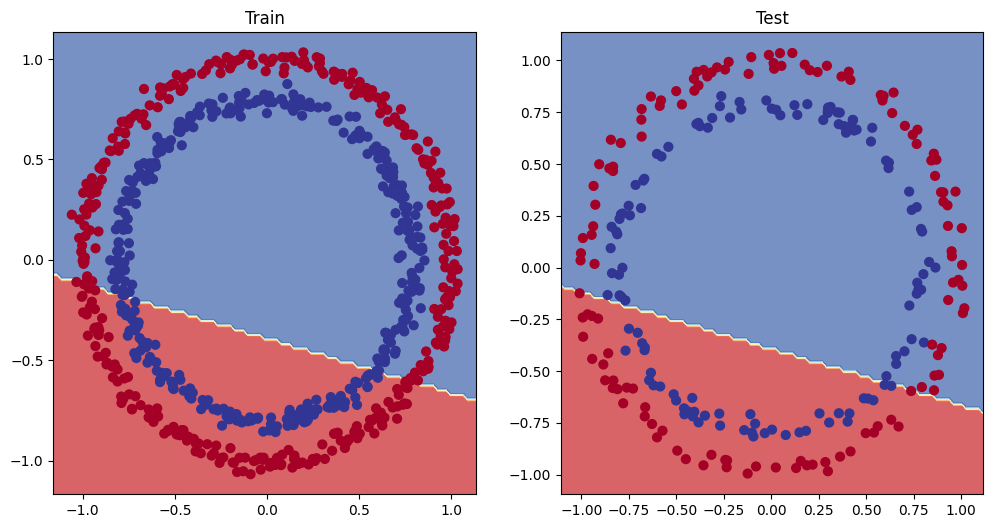

In [46]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle_classificatoin, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle_classificatoin, X_test, y_test)

## <b> Now it is clear that why model can not fit to the data! </b>

## <b> 4. Improving the model </b>

* Add more layers
* Add more hidden units
* Fit for longer
* Changing the activation functins
* Change the learning rate

In [47]:
# model version 2
class CircleModel_v2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z

model_circle_v2 = CircleModel_v2().to(device)
model_circle_v2

CircleModel_v2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [48]:
# loss function
loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params = model_circle_v2.parameters(),
                            lr = 0.1)

In [49]:
# training and evaluation loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # model on train mode
  model_circle_v2.train()

  # forward pass
  y_logits_train = model_circle_v2(X_train).squeeze()
  y_pred_train = torch.round(torch.sigmoid(y_logits_train))  # logits -> prediction probabilities -> prediction label

  # calculate loss / acc
  loss_train = loss_fn(y_logits_train, y_train)
  acc_train = accuracy_fn(y_true = y_train,
                    y_pred = y_pred_train)

  # optimizer zero gradients
  optimizer.zero_grad()

  # backpropagation
  loss_train.backward()

  # gradient descent
  optimizer.step()

  ### TESTING ###
  model_circle_v2.eval()
  with torch.inference_mode():
    y_logits_test = model_circle_v2(X_test).squeeze()
    y_pred_test = torch.round(torch.sigmoid(y_logits_test))

    # test loss
    loss_test = loss_fn(y_logits_test, y_test)
    acc_test = accuracy_fn(y_true = y_test, y_pred = y_pred_test)

  # print what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss train: {loss_train:.5f} | Acc train: {acc_train:.2f}% | Loss test: {loss_test:.5f} | Acc test: {acc_test:.2f}%")

Epoch: 0 | Loss train: 0.69377 | Acc train: 51.07% | Loss test: 0.69343 | Acc test: 50.00%
Epoch: 10 | Loss train: 0.69357 | Acc train: 51.20% | Loss test: 0.69346 | Acc test: 50.00%
Epoch: 20 | Loss train: 0.69342 | Acc train: 50.40% | Loss test: 0.69351 | Acc test: 52.40%
Epoch: 30 | Loss train: 0.69330 | Acc train: 50.40% | Loss test: 0.69358 | Acc test: 54.80%
Epoch: 40 | Loss train: 0.69321 | Acc train: 50.40% | Loss test: 0.69366 | Acc test: 52.80%
Epoch: 50 | Loss train: 0.69315 | Acc train: 51.87% | Loss test: 0.69374 | Acc test: 52.80%
Epoch: 60 | Loss train: 0.69310 | Acc train: 52.40% | Loss test: 0.69382 | Acc test: 52.00%
Epoch: 70 | Loss train: 0.69306 | Acc train: 52.93% | Loss test: 0.69390 | Acc test: 50.80%
Epoch: 80 | Loss train: 0.69302 | Acc train: 53.07% | Loss test: 0.69398 | Acc test: 52.80%
Epoch: 90 | Loss train: 0.69300 | Acc train: 53.73% | Loss test: 0.69405 | Acc test: 51.20%
Epoch: 100 | Loss train: 0.69298 | Acc train: 54.80% | Loss test: 0.69412 | Acc t

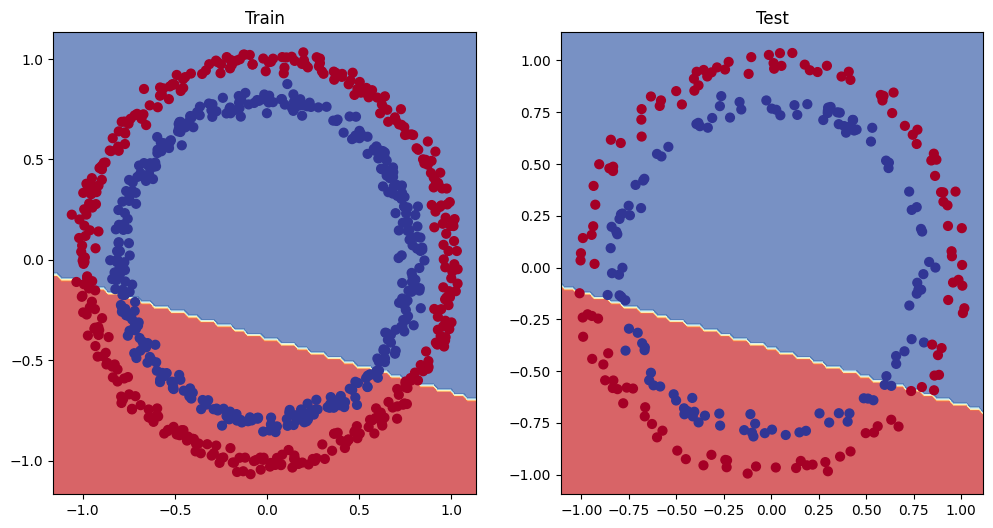

In [50]:
# plot the decision boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle_v2, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle_v2, X_test, y_test)

## 5.1 Preparing data to see if your model can fit a straigh line

One way to troubleshoot a large problem is to test out a small problam

In [51]:
import torch
torch.__version__

'2.0.1+cu118'

In [52]:
# Ceate some data (asme as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [53]:
# create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression , y_train_regression = X_regression[:train_split], y_regression[:train_split]

In [54]:
# test split
X_test_regression , y_test_regression = X_regression[train_split:], y_regression[train_split:]

In [55]:
# check the length of each
print(f"X_train_regression length: {X_train_regression.shape}")
print(f"y_train_regression length: {y_train_regression.shape}")
print(f"X_test_regression length: {X_test_regression.shape}")
print(f"y_test_regression length: {y_test_regression.shape}")

X_train_regression length: torch.Size([80, 1])
y_train_regression length: torch.Size([80, 1])
X_test_regression length: torch.Size([20, 1])
y_test_regression length: torch.Size([20, 1])


In [56]:
# download helper functions
import requests
from pathlib import Path

# download helper functions from learn PyTorch if it's not already downloaded
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping downloading")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping downloading


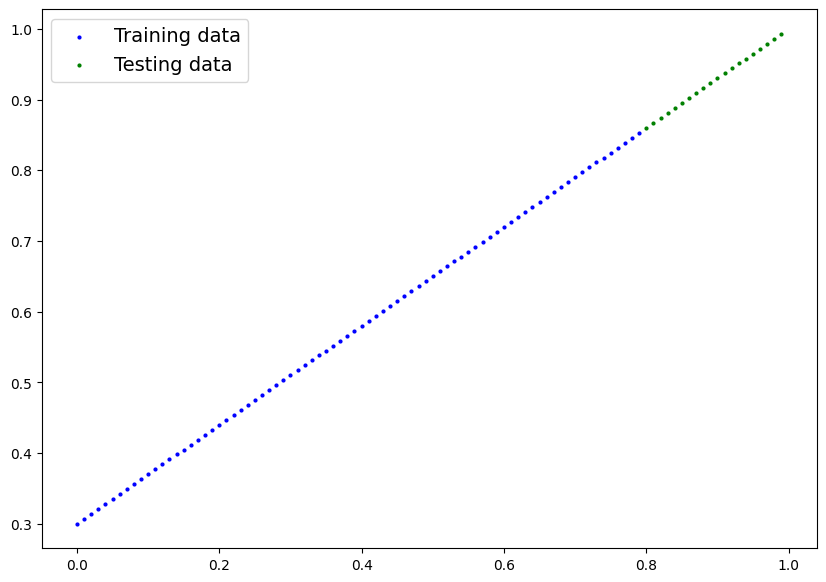

In [57]:
# plot our data
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

In [58]:
model_circle_v2

CircleModel_v2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.3 Adjusting `model_circle_v2` to fit a straight line

`in_features` and `out_features` of our model should be adjusted to our new data

In [59]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [60]:
# same architecture as `CircleModel_v2` with different in and out features
from torch import nn

model_test = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)

model_test

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [61]:
# Loss and optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_test.parameters(), lr=0.1)

In [62]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_test(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_test.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_test(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05600, Test loss: 0.01425
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603
